In [233]:
import numpy as np
import pandas as pd
from sklearn import linear_model

%pylab inline

Populating the interactive namespace from numpy and matplotlib


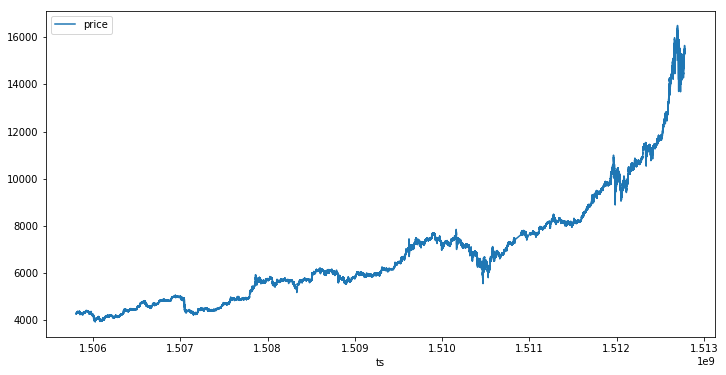

In [267]:
df = pd.read_csv('data.csv', sep=",", names=['ts', 'price', 'hz'])
ax = df.plot(x='ts', y='price', figsize=(12, 6))

In [133]:
# df_trends = pd.read_csv('google.csv', sep=",", names=['date', 'val'])
# t_plot = df_trends.plot(x='date', y='val', figsize=(12, 6))

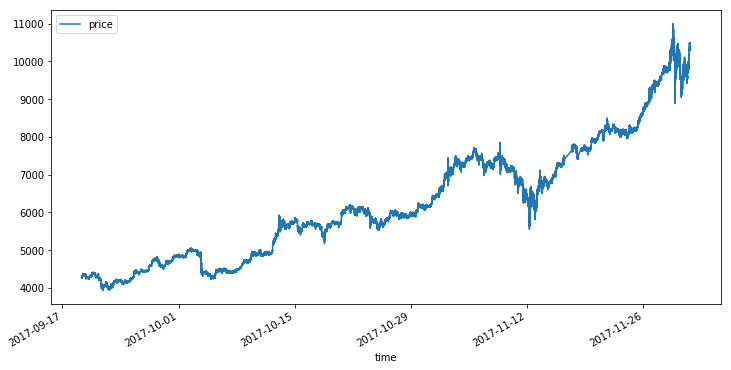

In [32]:
# training data plot
train_df = df[:1000000]
test_df = df[1000000:]
tx = train_df.plot(x='time', y='price', figsize=(12, 6))

In [136]:
# TODO make this a f(df, win_size) -> X, y
# apply f to train_df & test_df
# y^ = regr.predict(test_features)
# add y^ as column to df (not forget shift first win_size items) -> plt 

def prepare_data(prices, win_size):
    windows = []
    for i in range(len(prices) - win_size):
        windows.append(prices[i:i + win_size])
        
    wx = np.vstack(windows)

    targets = []
    for i in range(len(prices) - win_size):
        targets.append(prices[i + win_size])
        
    tx = np.vstack(targets)

    return wx, tx

In [187]:
regr = linear_model.LinearRegression()

win_size = 100
train_prices = train_df.price.values
train_x, train_t = prepare_data(train_prices, win_size)
train_reg = regr.fit(train_x, train_t)

test_prices = test_df.price.values
price_mtrx = []

for i in range(len(test_prices) - win_size):
    price_mtrx.append(test_prices[i:i + win_size])
    
price_predict = regr.predict(price_mtrx)

array([1512145912, 1512145919, 1512145923, ..., 1512782416, 1512782421,
       1512782422])

In [260]:
columns = ['price','ts']
index = []

for i, item in enumerate(price_predict - win_size):
    index.append([price_predict[i][0], test_ts[i]])

index = np.array(index)
res_df = pd.DataFrame(data=index, columns=columns)

In [276]:
# results dataframe

# res_df.plot(x='ts', y='price', figsize=(12, 6))

test_df = test_df.drop('hz', axis=1)


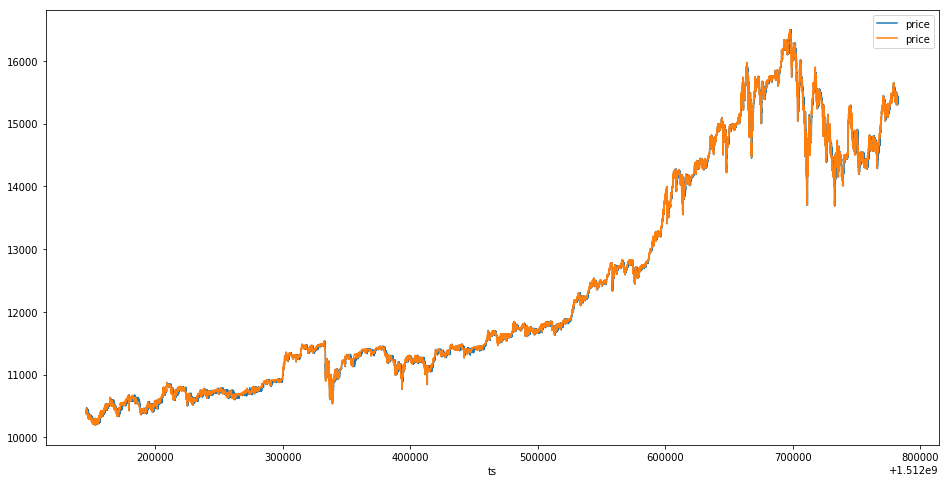

In [282]:
ax = test_df.plot(x='ts', y='price')

res_df.plot(x='ts', y='price', ax=ax, figsize=(16, 8))